In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Preparation

In [127]:
## Generating two normal distributions with given mean and covariance 
## No.of Features = 2

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.1]])

mean_02 = np.array([4,3])
cov_02 = np.array([[1.21, 0.1],[0.1, 1.2]])

# Normal Distribution -> 500 points

dist_1 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_2 = np.random.multivariate_normal(mean_02, cov_02, 500)

### Data Visualization

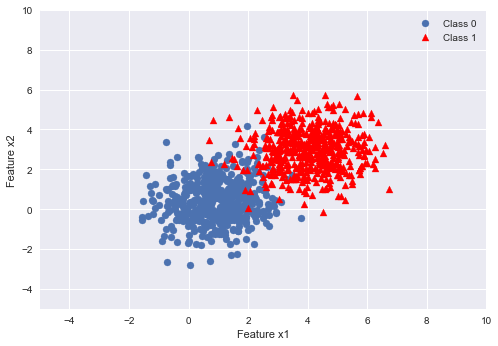

In [128]:
plt.style.use('seaborn')
plt.scatter(dist_1[:,0], dist_1[:,1], label='Class 0')
plt.scatter(dist_2[:,0], dist_2[:,1], label='Class 1', color='r', marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

### Create Training and Test sets

In [129]:
# We will create a dataset out of the two distributions generated above and split it into Training - Test data

data = np.zeros((1000,3))
data[:500,:2] = dist_1
data[500:,:2] = dist_2
data[500:,-1] = 1.0     ## To get the labels or target values
np.random.shuffle(data)

In [130]:
# Split the dataset into Training and Test set (80:20)

split = int(0.80*data.shape[0])

X_train = data[:split, :2]
X_test = data[split:, :2]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

### Logistic Regression Functions

In [131]:
def hypothesis(x,w,b):
    # This function will take input vector x, weight vector w, bias b and return the hypothesis or predicted value
    
    hx = np.dot(x,w) + b
    return sigmoid(hx)

def sigmoid(z):
    sig = 1.0/(1.0 + np.exp(-1.0*z))
    return sig

def error(y_true, X, w, b):
    # This function computes the average error, which is the negative log likelihood
    
    m = X.shape[0]
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i],w,b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    err = -1.0*err
    return err/m

def gradient(y_true, X, w, b):
    # This function computes the gradient values
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],w,b)
        grad_w += (y_true[i]-hx)*X[i]
        grad_b += y_true[i]-hx
        
    grad_w = grad_w/m
    grad_b = grad_b/m
    
    return [grad_w, grad_b]

def gradient_ascent(X, y_true, w, b, learning_rate=0.1, max_iter=1000):
    # This function runs the gradient ascent update rule to maximise the logarithmic likelihood for max_iter times
    
    error_list = []
    
    for k in range(max_iter):
        
        err = error(y_true, X, w, b)
        error_list.append(err)
        [grad_w, grad_b] = gradient(y_true, X, w, b)
        
        w = w + learning_rate*grad_w  ## Update Rule for Weights
        b = b + learning_rate*grad_b  ## Update Rule for Bias
        
    return error_list, w, b

def get_accuracy(X_test, Y_test, W, b):
    # This function takes the test dataset and returns the accuracy of the prediction on the test dataset
    
    confidence = hypothesis(X_test, w, b)
    y_pred = []
    
    for val in confidence:
        if val<0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
            
    y_pred = np.array(y_pred)
    return float((y_pred==Y_test).sum())/Y_test.shape[0]

In [132]:
## Initialize the Weight vectors and call the function

W = 2*np.random.random((X_train.shape[1],))
B = 5*np.random.random()

error_list, w, b = gradient_ascent(X_train, Y_train, W, B)

In [133]:
accuracy = get_accuracy(X_test, Y_test, w, b)
print('Accuracy =',accuracy)

Accuracy = 0.965


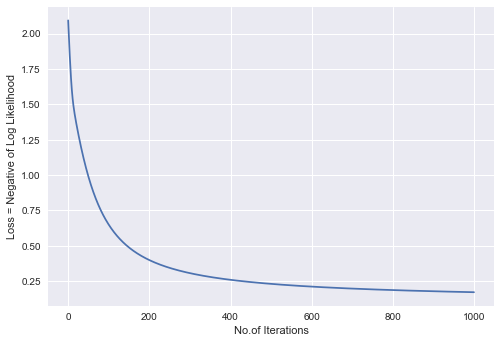

In [134]:
## Plot the loss function -> Error
## This indicates that the loss has significantly decreased over time

plt.plot(error_list)
plt.xlabel('No.of Iterations')
plt.ylabel('Loss = Negative of Log Likelihood')
plt.show()

### Decision Boundary

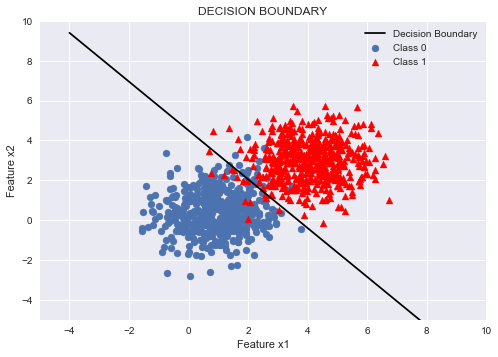

In [136]:
plt.style.use('seaborn')
plt.scatter(dist_1[:,0], dist_1[:,1], label='Class 0')
plt.scatter(dist_2[:,0], dist_2[:,1], label='Class 1', color='r', marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('DECISION BOUNDARY')
x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k', label='Decision Boundary')

plt.legend()
plt.show()